# Засоби підготовки та аналізу даних
### Лабораторна робота №4
##### ФБ-22 Ялбуган Федір

### Перший рівень (спрощені завдання)

Імпортуємо потрібні бібліотеки

In [147]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import timeit as ti
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Завантажуємо датасет та створюємо .csv файл

In [148]:
individual_household_electric_power_consumption = fetch_ucirepo(id=235)
X = individual_household_electric_power_consumption.data.features
X_df = pd.DataFrame(X)
X_df.to_csv('individual_household_electric_power_consumption.csv', index=False)
print(X_df)

c:\Users\fyalb\AppData\Local\Programs\Python\Python311\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

Завантажуємо датасет у змінні, видаляємо зниклі дані, перетворюємо рядкові дані на числові

In [149]:
data_df = pd.read_csv('individual_household_electric_power_consumption.csv')
data_df = data_df.dropna()
data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])
for column in data_df.columns[2:-1]:
    data_df[column] = pd.to_numeric(data_df[column], errors='coerce')
print(data_df)

C:\Users\fyalb\AppData\Local\Temp\ipykernel_18252\1788640558.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('individual_household_electric_power_consumption.csv')
C:\Users\fyalb\AppData\Local\Temp\ipykernel_18252\1788640558.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])


               Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0    

1. Обрати всі домогосподарства, у яких загальна активна споживана
потужність перевищує 5 кВт.

In [150]:
def task1_numpy(data):
    return data[data[:, 2] > 5]

def task1_dataframe(data):
    return data[data['Global_active_power'] > 5]

print('Виборка Numpy:\n', task1_numpy(data_np))
print("Час виконання Numpy:", ti.timeit(lambda: task1_numpy(data_np), number=1))

print('Виборка DataFrame:\n', task1_dataframe(data_df))
print("Час виконання DataFrame:", ti.timeit(lambda: task1_dataframe(data_df), number=1))

Виборка Numpy:
 [['16/12/2006' '17:25:00' 5.36 ... 1.0 16.0
  Timestamp('2006-12-16 17:25:00')]
 ['16/12/2006' '17:26:00' 5.374 ... 2.0 17.0
  Timestamp('2006-12-16 17:26:00')]
 ['16/12/2006' '17:27:00' 5.388 ... 1.0 17.0
  Timestamp('2006-12-16 17:27:00')]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 38.0 17.0
  Timestamp('2010-11-24 07:50:00')]
 ['24/11/2010' '07:51:00' 5.75 ... 39.0 17.0
  Timestamp('2010-11-24 07:51:00')]
 ['25/11/2010' '07:21:00' 5.074 ... 2.0 18.0
  Timestamp('2010-11-25 07:21:00')]]
Час виконання Numpy: 0.04809229995589703
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
11       16/12/2006  17:35:00                5.412                  0.470   
12       16/12/2006  17:36:00                5

2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [151]:
def task2_numpy(data):
    return data[data[:, 4] > 235]

def task2_dataframe(data):
    return data[data['Voltage'] > 235]

print('Виборка Numpy:\n', task2_numpy(data_np))
print("Час виконання Numpy:", ti.timeit(lambda: task2_numpy(data_np), number=1))

print('Виборка DataFrame:\n', task2_dataframe(data_df))
print("Час виконання DataFrame:", ti.timeit(lambda: task2_dataframe(data_df), number=1))


Виборка Numpy:
 [['16/12/2006' '17:28:00' 3.666 ... 1.0 17.0
  Timestamp('2006-12-16 17:28:00')]
 ['16/12/2006' '17:29:00' 3.52 ... 2.0 17.0
  Timestamp('2006-12-16 17:29:00')]
 ['16/12/2006' '17:30:00' 3.702 ... 1.0 17.0
  Timestamp('2006-12-16 17:30:00')]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0
  Timestamp('2010-11-26 21:00:00')]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0
  Timestamp('2010-11-26 21:01:00')]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0
  Timestamp('2010-11-26 21:02:00')]]
Час виконання Numpy: 0.41651170002296567
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
4        16/12/2006  17:28:00                3.666                  0.528   
5        16/12/2006  17:29:00                3.520                  0.522   
6        16/12/2006  17:30:00                3.702                  0.520   
7        16/12/2006  17:31:00                3.700                  0.520   
14       16/12/2006  17:38:00                4.054

3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [152]:
def task3_numpy(data):
    return data[(data[:, 7] > data[:, 8]) & (data[:, 5] <= 20) & (data[:, 5] >= 19)]

def task3_dataframe(data):
    return data[(data['Sub_metering_2'] > data['Sub_metering_3']) & (data['Global_intensity'] <= 20) & (data['Global_intensity'] >= 19)]

print('Виборка Numpy:\n', task3_numpy(data_np))
print("Час виконання Numpy:", ti.timeit(lambda: task3_numpy(data_np), number=1))

print('Виборка DataFrame:\n', task3_dataframe(data_df))
print("Час виконання DataFrame:", ti.timeit(lambda: task3_dataframe(data_df), number=1))


Виборка Numpy:
 [['16/12/2006' '18:09:00' 4.464 ... 37.0 16.0
  Timestamp('2006-12-16 18:09:00')]
 ['17/12/2006' '01:04:00' 4.582 ... 13.0 0.0
  Timestamp('2006-12-17 01:04:00')]
 ['17/12/2006' '01:08:00' 4.618 ... 27.0 0.0
  Timestamp('2006-12-17 01:08:00')]
 ...
 ['24/11/2010' '07:55:00' 4.602 ... 40.0 17.0
  Timestamp('2010-11-24 07:55:00')]
 ['24/11/2010' '07:56:00' 4.536 ... 39.0 17.0
  Timestamp('2010-11-24 07:56:00')]
 ['24/11/2010' '07:57:00' 4.626 ... 39.0 17.0
  Timestamp('2010-11-24 07:57:00')]]
Час виконання Numpy: 0.11961460008751601
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
45       16/12/2006  18:09:00                4.464                  0.136   
460      17/12/2006  01:04:00                4.582                  0.258   
464      17/12/2006  01:08:00                4.618                  0.104   
475      17/12/2006  01:19:00                4.636                  0.140   
476      17/12/2006  01:20:00             

4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії

In [153]:
def generate_random_sample(data, size=500000):
    return data.sample(n=size, replace=False)

def task4_numpy(data):
    sub_metering_means = np.mean(data[:, 6:9], axis=0)
    return sub_metering_means

def task4_dataframe(data):
    sub_metering_means = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return sub_metering_means

random_sample = generate_random_sample(data_df)

print('Виборка Numpy:\n', task4_numpy(random_sample.values))
print("Час виконання Numpy:", ti.timeit(lambda: task4_numpy(random_sample.values), number=1))

print('Виборка DataFrame:\n', task4_dataframe(random_sample))
print("Час виконання DataFrame:", ti.timeit(lambda: task4_dataframe(random_sample), number=1))

Виборка Numpy:
 [1.116676 1.288216 6.451366]
Час виконання Numpy: 0.4819275999907404
Виборка DataFrame:
 Sub_metering_1    1.116676
Sub_metering_2    1.288216
Sub_metering_3    6.451366
dtype: float64
Час виконання DataFrame: 0.01243980007711798


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [155]:
def task5_numpy(random_sample):
    hours = np.array([int(time.split(':')[0]) for time in random_sample[:, 1]])

    np_after_18 = random_sample[hours >= 18]

    high_power_consumption = np_after_18[np_after_18[:, 2].astype(float) > 6]

    filtered_households = high_power_consumption[
        (high_power_consumption[:, 6].astype(float) + 
         high_power_consumption[:, 7].astype(float) + 
         high_power_consumption[:, 8].astype(float)) > 6]

    first_half = filtered_households[:len(filtered_households) // 2]
    second_half = filtered_households[len(filtered_households) // 2:]
    result = np.concatenate([first_half[::3], second_half[::4]])

    return result

def task5_dataframe(random_sample):
    df = random_sample.copy() 

    df_after_18 = df[df['DateTime'].dt.hour >= 18]

    average_power_consumption = df_after_18.groupby('DateTime')['Global_active_power'].mean()

    high_power_consumption = average_power_consumption[average_power_consumption > 6]

    filtered_households = df[df['DateTime'].isin(high_power_consumption.index)]
    filtered_households = filtered_households[
        (filtered_households['Sub_metering_1'] + 
         filtered_households['Sub_metering_2'] + 
         filtered_households['Sub_metering_3']) > 6]

    first_half = filtered_households.iloc[:len(filtered_households)//2]
    second_half = filtered_households.iloc[len(filtered_households)//2:]

    result = pd.concat([first_half.iloc[::3], second_half.iloc[::4]])

    return result

print('Виборка Numpy:\n', task5_numpy(data_np))
print("Час виконання Numpy:", ti.timeit(lambda: task5_numpy(data_np), number=1))
print('Виборка DataFrame:\n', task5_dataframe(data_df))
print("Час виконання DataFrame:", ti.timeit(lambda: task5_dataframe(data_df), number=1))

Виборка Numpy:
 [['16/12/2006' '18:05:00' 6.052 ... 37.0 17.0
  Timestamp('2006-12-16 18:05:00')]
 ['16/12/2006' '18:08:00' 6.308 ... 36.0 17.0
  Timestamp('2006-12-16 18:08:00')]
 ['17/12/2006' '18:18:00' 6.204 ... 0.0 16.0
  Timestamp('2006-12-17 18:18:00')]
 ...
 ['20/11/2010' '18:40:00' 6.416 ... 35.0 16.0
  Timestamp('2010-11-20 18:40:00')]
 ['20/11/2010' '18:44:00' 6.374 ... 36.0 16.0
  Timestamp('2010-11-20 18:44:00')]
 ['20/11/2010' '18:52:00' 6.364 ... 34.0 16.0
  Timestamp('2010-11-20 18:52:00')]]
Час виконання Numpy: 0.7419848000863567
Виборка DataFrame:
                Date      Time  Global_active_power  Global_reactive_power  \
41       16/12/2006  18:05:00                6.052                  0.192   
44       16/12/2006  18:08:00                6.308                  0.116   
1494     17/12/2006  18:18:00                6.204                  0.116   
8884     22/12/2006  21:28:00                7.884                  0.136   
8887     22/12/2006  21:31:00             

### Другий рівень (ускладнений)

Завантажуємо обраний датасет

In [156]:
automobile = fetch_ucirepo(id=10) 
  
X = automobile.data.features 

X_df = pd.DataFrame(X)

X_df.to_csv('automobile.csv', index=False)

print(X_df)

       price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-s

Завантажуємо дані із файлу

In [157]:
automobile_df = pd.read_csv('automobile.csv')
print(automobile_df)

       price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-s

1. Поборотися із зниклими даними.

In [158]:
automobile_df = automobile_df.dropna()
print(automobile_df)

       price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
6    17710.0           25        19    5500.0       110.0                8.5   
8    23875.0           20        17    5500.0       140.0                8.3   
10   16430.0           29        23    5800.0       101.0                8.8   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-s

2. Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [159]:
normalized = ['price', 'peak-rpm', 'stroke', 'bore', 'normalized-losses', 'horsepower']

for col in normalized:
    min_val = automobile_df[col].min()
    max_val = automobile_df[col].max()
    automobile_df[col] = (automobile_df[col] - min_val) / (max_val - min_val)
print(automobile_df)

        price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3    0.295010           30        24  0.551020    0.355263               10.0   
4    0.411918           22        18  0.551020    0.440789                8.0   
6    0.420603           25        19  0.551020    0.407895                8.5   
8    0.626528           20        17  0.551020    0.605263                8.3   
10   0.377848           29        23  0.673469    0.348684                8.8   
..        ...          ...       ...       ...         ...                ...   
200  0.391710           28        23  0.510204    0.434211                9.5   
201  0.465195           25        19  0.469388    0.736842                8.7   
202  0.546697           23        18  0.551020    0.565789                8.8   
203  0.579598           27        26  0.265306    0.381579               23.0   
204  0.584775           25        19  0.510204    0.434211                9.5   

       stroke      bore fue

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

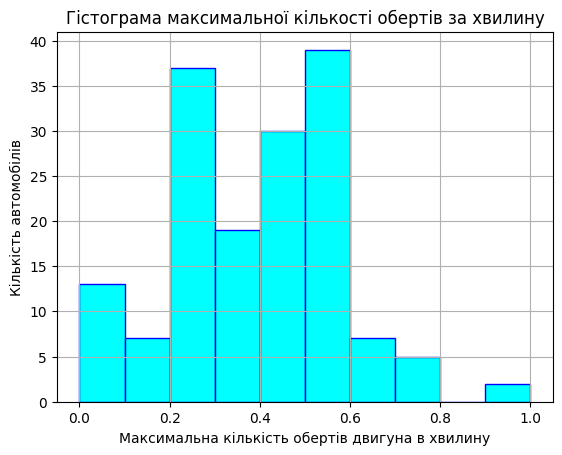

In [160]:
column_name = 'peak-rpm'
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(automobile_df[column_name], bins=bins, edgecolor='blue', color='cyan')
plt.title(f'Гістограма максимальної кількості обертів за хвилину')
plt.xlabel('Максимальна кількість обертів двигунa в хвилину')
plt.ylabel('Кількість автомобілів')
plt.grid(True) 
plt.show()


4. Збудувати графік залежності одного integer/real атрибута від іншого.

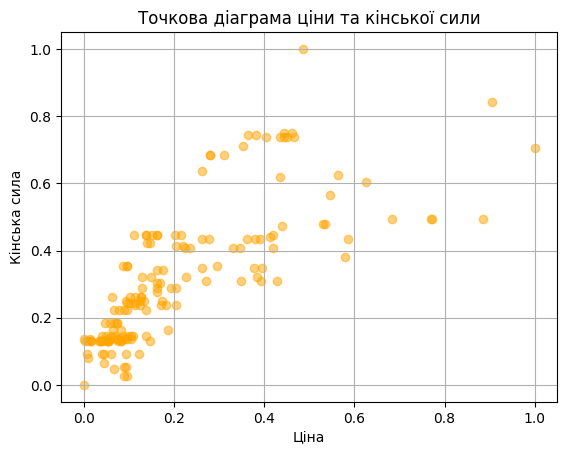

In [161]:
x_variable = 'price'
y_variable = 'horsepower'

plt.scatter(automobile_df[x_variable], automobile_df[y_variable], color = 'orange', alpha = 0.5)
plt.xlabel('Ціна')
plt.ylabel('Кінська сила')
plt.title(f'Точкова діаграма ціни та кінської сили')
plt.grid(True)
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [162]:
variable_1 = 'price'
variable_2 = 'horsepower'

pearson = automobile_df[variable_1].corr(automobile_df[variable_2])
spearman = automobile_df[variable_1].corr(automobile_df[variable_2], method='spearman')

print(f"Коефіцієнт Пірсона: {pearson}")
print(f"Коефіцієнт Спірмена: {spearman}")

Коефіцієнт Пірсона: 0.7598739453800998
Коефіцієнт Спірмена: 0.8610392048532152


6. Провести One Hot Encoding категоріального string атрибуту.

In [163]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(automobile_df[['drive-wheels']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])
result_df = pd.concat([automobile_df, encoded_df], axis=1)

print("Original DataFrame:")
print(automobile_df)
print("\nEncoded DataFrame:")
print(result_df)

Original DataFrame:
        price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3    0.295010           30        24  0.551020    0.355263               10.0   
4    0.411918           22        18  0.551020    0.440789                8.0   
6    0.420603           25        19  0.551020    0.407895                8.5   
8    0.626528           20        17  0.551020    0.605263                8.3   
10   0.377848           29        23  0.673469    0.348684                8.8   
..        ...          ...       ...       ...         ...                ...   
200  0.391710           28        23  0.510204    0.434211                9.5   
201  0.465195           25        19  0.469388    0.736842                8.7   
202  0.546697           23        18  0.551020    0.565789                8.8   
203  0.579598           27        26  0.265306    0.381579               23.0   
204  0.584775           25        19  0.510204    0.434211                9.5   

       

7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

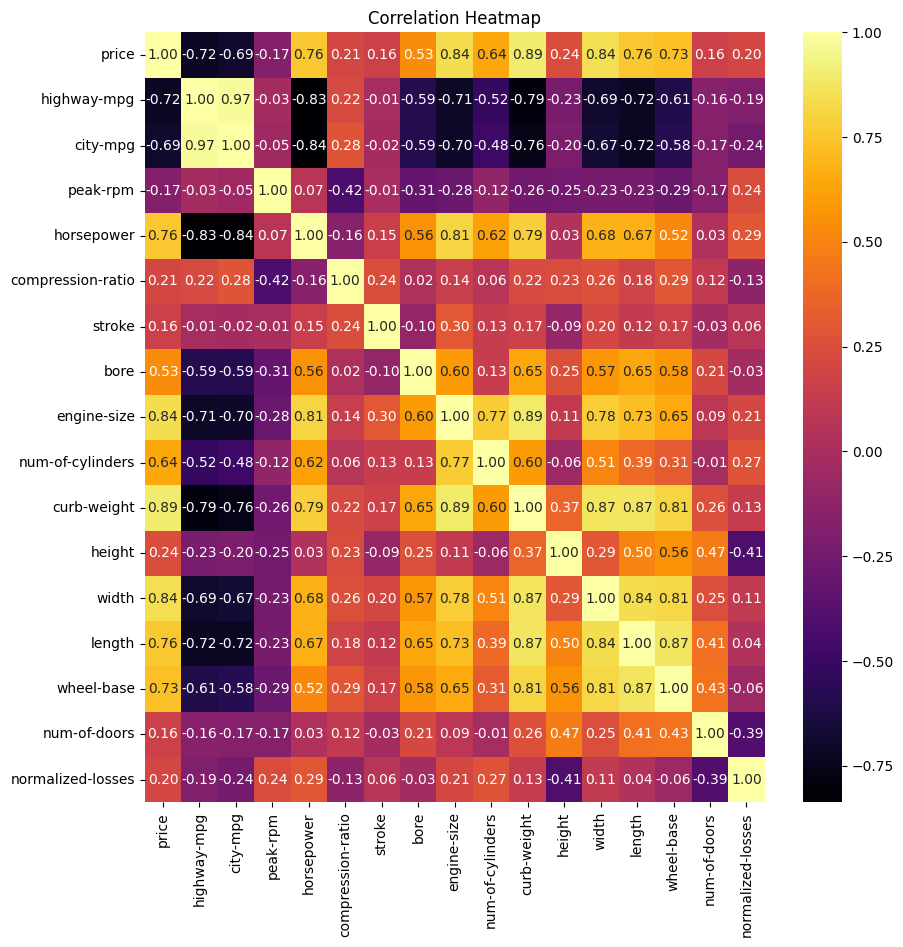

In [164]:
numeric_columns = automobile_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = automobile_df[numeric_columns]

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
